## <center>Лабораторна робота №1</center>
#### <center>Вибірковий метод та його характеристики</center>

**Мета роботи:**  вивчити методи утворення репрезентативної вибірки.

***
1. Для дослідження візьмемо статистику середньодобової відносної вологості повітря у індійському місті Колката
***

In [142]:
import pandas as pd
df = pd.read_csv('./fiveyearsweatherdata.csv')
analysis_set = df["Relative Humidity"]
analysis_set

0       82.47
1       76.76
2       73.12
3       72.57
4       71.88
        ...  
1821    83.47
1822    79.94
1823    81.38
1824    88.30
1825    82.20
Name: Relative Humidity, Length: 1826, dtype: float64

***
2. Вибираємо 100 випадкових значень
***

In [143]:
import random

n = 100
sequence = random.sample(analysis_set.tolist(), n)
print(sequence)

[91.91, 91.6, 94.79, 61.25, 82.34, 61.83, 77.04, 87.46, 90.93, 85.43, 45.5, 85.67, 88.22, 66.89, 83.6, 68.83, 90.03, 77.44, 86.69, 81.67, 62.55, 77.16, 65.57, 82.08, 83.38, 55.75, 55.31, 89.59, 78.72, 84.73, 74.31, 45.78, 90.09, 67.49, 83.26, 69.05, 83.63, 78.2, 69.81, 90.63, 82.72, 88.05, 73.61, 89.77, 57.94, 89.86, 71.89, 82.52, 70.86, 61.74, 72.48, 81.05, 85.63, 68.67, 66.19, 66.62, 88.6, 71.95, 75.61, 88.71, 73.4, 64.31, 82.47, 82.76, 62.54, 83.28, 68.07, 56.29, 86.82, 77.73, 68.38, 76.65, 81.34, 83.47, 84.23, 64.5, 91.96, 90.64, 74.13, 82.39, 69.66, 74.77, 65.89, 61.1, 71.26, 70.89, 72.0, 77.76, 68.36, 70.86, 79.56, 88.16, 67.69, 87.91, 78.99, 74.49, 91.97, 67.03, 62.17, 92.49]


***
3. Ранжуємо вибірку
***

In [144]:
sequence.sort()
print(sequence)

[45.5, 45.78, 55.31, 55.75, 56.29, 57.94, 61.1, 61.25, 61.74, 61.83, 62.17, 62.54, 62.55, 64.31, 64.5, 65.57, 65.89, 66.19, 66.62, 66.89, 67.03, 67.49, 67.69, 68.07, 68.36, 68.38, 68.67, 68.83, 69.05, 69.66, 69.81, 70.86, 70.86, 70.89, 71.26, 71.89, 71.95, 72.0, 72.48, 73.4, 73.61, 74.13, 74.31, 74.49, 74.77, 75.61, 76.65, 77.04, 77.16, 77.44, 77.73, 77.76, 78.2, 78.72, 78.99, 79.56, 81.05, 81.34, 81.67, 82.08, 82.34, 82.39, 82.47, 82.52, 82.72, 82.76, 83.26, 83.28, 83.38, 83.47, 83.6, 83.63, 84.23, 84.73, 85.43, 85.63, 85.67, 86.69, 86.82, 87.46, 87.91, 88.05, 88.16, 88.22, 88.6, 88.71, 89.59, 89.77, 89.86, 90.03, 90.09, 90.63, 90.64, 90.93, 91.6, 91.91, 91.96, 91.97, 92.49, 94.79]


***
4. Знайдемо розмах вибірки
***

In [145]:
r = round(sequence[-1] - sequence[0], 2)
print(f"Розмах вибірки: {sequence[-1]} - {sequence[0]} = {r}")

Розмах вибірки: 94.79 - 45.5 = 49.29


***

<br>

 <br>

 <br>

 <br>

 <br>

***

## <center>Лабораторна робота №2</center>
#### <center>Створення інтервального статистичного розподілу вибірки, графічні зображення та числові характеристики вибірки</center>

**Мета роботи:** навчитися: створювати інтервальний статистичний розподіл з варіант
вибірки; зображати графічно інтервальний статистичний розподіл (побудова
полігону, гістограми та кумуляти), знаходження моди та медіани за
графічними зображеннями; обчислення числових характеристик ( середнього
зваженого, дисперсії, асиметрії і ексцесу (за потреби)) вибірки.

In [146]:
r = round(sequence[-1] - sequence[0], 2)
print(f"Розмах вибірки: {sequence[-1]} - {sequence[0]} = {r}")

Розмах вибірки: 94.79 - 45.5 = 49.29


TODO: формули інтервалів

In [147]:
import math

m = 1 + 3.3221 * math.log(n, 10)
m = round(m)

k = r / (1 + 3.221 * math.log(n, 10))
k = round(k, 2)

print (f"Кількість інтервалів: m = {m}")
print (f"Довжина інтервалу: k = {k}")

Кількість інтервалів: m = 8
Довжина інтервалу: k = 6.62


In [148]:
x_start = sequence[0] - k / 2
x_start = round(x_start, 2)
x_start

42.19

In [149]:
from tabulate import tabulate

range_start = round(x_start, 2)
range_end = round(range_start + k, 2)
interval_table = []
cumm_count_in_range = 0
cumm_freq = 0

def count(list1, l, r):
    return len(list(x for x in list1 if l <= x <= r))

headers = ["i", "Інтервал", "Середини інтервалів", "Частота", "Частість", "Накопичена частота", "Накопичена частість"]
interval_table.append(headers)

for row in range(1, m + 1):
    table_row = []
    
    table_row.append(row)

    row_range = ( range_start, range_end )
    table_row.append(f"{row_range[0]}-{row_range[-1]}")

    range_mid = (row_range[-1] + row_range[0]) / 2
    table_row.append(round(range_mid) if range_mid % 1 == 0 else round(range_mid, 2))

    count_in_range = count(sequence, row_range[0], row_range[-1])
    table_row.append(count_in_range)

    freq = round(count_in_range / n, 3)
    table_row.append(freq)

    cumm_count_in_range += count_in_range
    table_row.append(cumm_count_in_range)

    cumm_freq = round(cumm_freq + freq, 3)
    table_row.append(cumm_freq)

    interval_table.append(table_row)
    range_start = range_end
    range_end = round(range_end + k, 2)

print(tabulate(interval_table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════════╤═══════════════════════╤═══════════╤════════════╤══════════════════════╤═══════════════════════╕
│   i │ Інтервал    │   Середини інтервалів │   Частота │   Частість │   Накопичена частота │   Накопичена частість │
╞═════╪═════════════╪═══════════════════════╪═══════════╪════════════╪══════════════════════╪═══════════════════════╡
│   1 │ 42.19-48.81 │                 45.5  │         2 │       0.02 │                    2 │                  0.02 │
├─────┼─────────────┼───────────────────────┼───────────┼────────────┼──────────────────────┼───────────────────────┤
│   2 │ 48.81-55.43 │                 52.12 │         1 │       0.01 │                    3 │                  0.03 │
├─────┼─────────────┼───────────────────────┼───────────┼────────────┼──────────────────────┼───────────────────────┤
│   3 │ 55.43-62.05 │                 58.74 │         7 │       0.07 │                   10 │                  0.1  │
├─────┼─────────────┼───────────────────────┼───────────

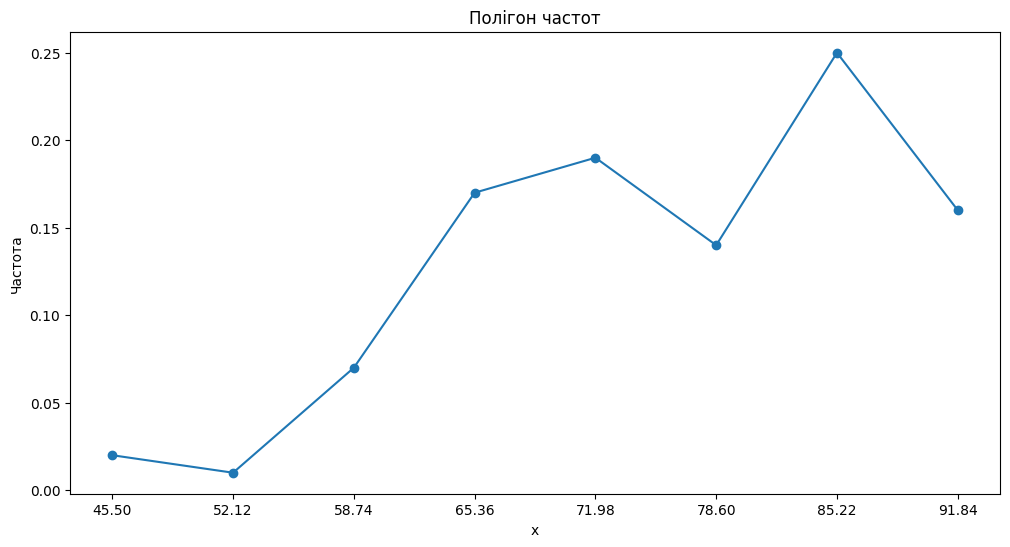

In [178]:
from cProfile import label
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

def getColumnValues(index):
    values = []
    for row in interval_table[1:]:
        values.append(row[index])
    return values

x_polygon = getColumnValues(2)
y_polygon = getColumnValues(4)

plt.plot(x_polygon, y_polygon, marker='o', markersize=6)
plt.xticks(x_polygon)
plt.xlabel('x')
plt.ylabel('Частота')
plt.title("Полігон частот")
plt.show()

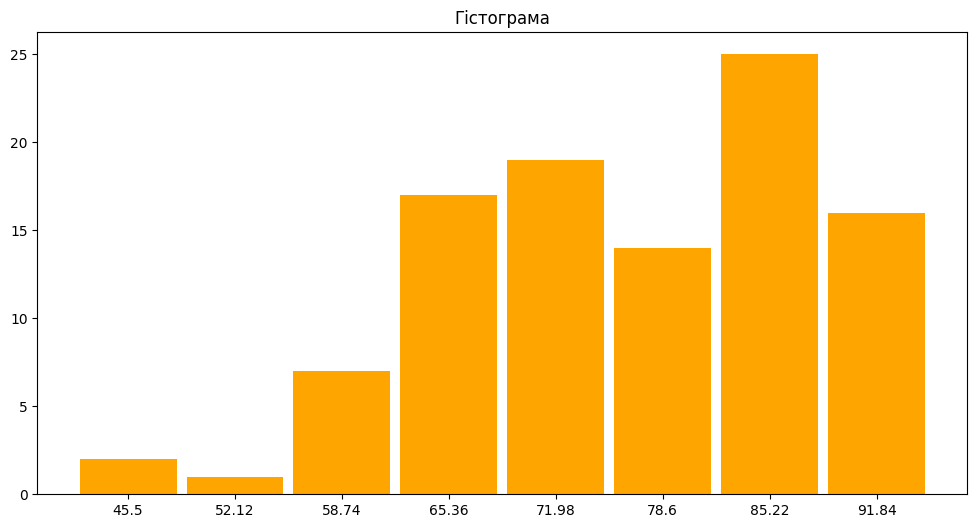

In [179]:
hist_range = (x_start, range_end)
hist_y = getColumnValues(2)
hist_values = getColumnValues(3)
plt.figure(figsize=(12, 6))
# nu, bins, pathces = 
plt.bar(hist_y, hist_values, tick_label = hist_y, color='orange', width=6)
plt.title("Гістограма")
# plt.xticks(bins)
plt.show()